DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm particularly well-suited for discovering clusters of varying shapes and handling noise (outliers).

Key Concepts of DBSCAN

Core Point: A point is a core point if it has at least minPts points (including itself) within a radius eps.

Border Point: A point that is within eps distance of a core point but has fewer than minPts points within its eps neighborhood.

Noise Point: Any point that is neither a core point nor a border point.

Example with Visualization

Let’s create a synthetic dataset and apply DBSCAN to demonstrate its behavior.

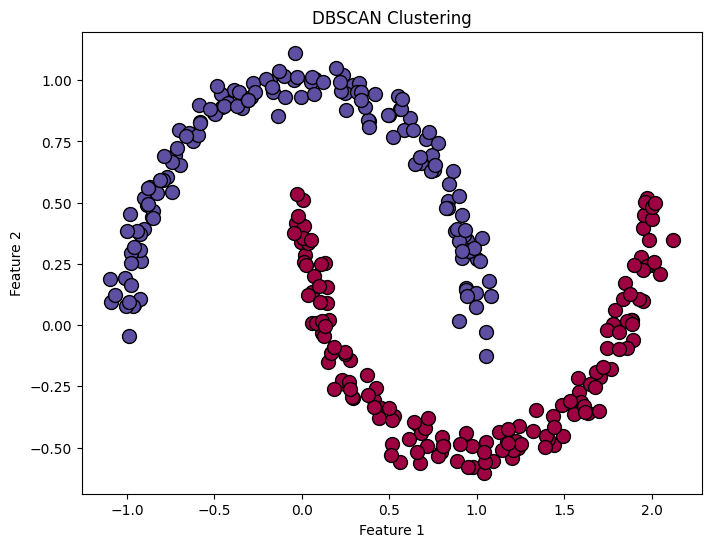

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate sample data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Apply DBSCAN
db = DBSCAN(eps=0.2, min_samples=5).fit(X)
labels = db.labels_

# Plot the results
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(8, 6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise

    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col[:3]), markeredgecolor='k', markersize=10)

plt.title("DBSCAN Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Explanation of the Graph

Clusters: Each distinct color represents a cluster discovered by DBSCAN.

Noise: Black points represent outliers that were not assigned to any cluster.

Arbitrary Shapes: DBSCAN effectively identifies non-spherical clusters (e.g., the two crescent shapes in the make_moons dataset).

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

# Generate sample data
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Create a DataFrame
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])

# Save to CSV
file_path = "DBSCAN_sample_data.csv"
df.to_csv(file_path, index=False)

file_path


'DBSCAN_sample_data.csv'

In [3]:
import pandas as pd

# Load the uploaded dataset
file_path = 'Mall_Customers.csv'
mall_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
mall_data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Next Steps:

I will apply DBSCAN clustering on two relevant features, "Annual Income (k$)" and "Spending Score (1-100)," and visualize the results.

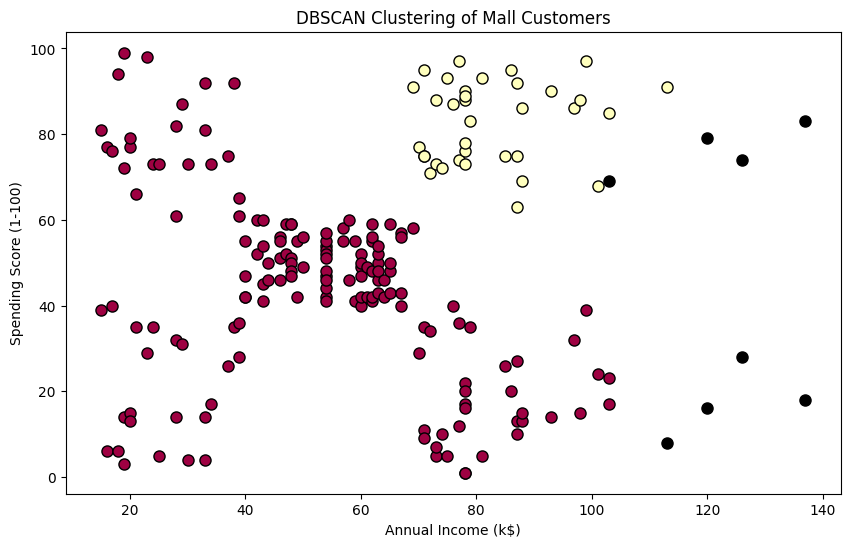

'Mall_Customers_with_Clusters.csv'

In [4]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(scaled_features)

# Add cluster labels to the original dataset
mall_data['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(10, 6))
unique_labels = set(clusters)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]  # Black for noise
    class_member_mask = (clusters == k)
    xy = features[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col[:3]),
             markeredgecolor='k', markersize=8)

plt.title("DBSCAN Clustering of Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

# Save the updated dataset with cluster labels
output_file_path = "Mall_Customers_with_Clusters.csv"
mall_data.to_csv(output_file_path, index=False)

output_file_path


In [ ]:
# Display information about the DataFrame
mall_data_info = mall_data.info()

# Display summary statistics for numerical columns
mall_data_description = mall_data.describe()

mall_data_info, mall_data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
 5   Cluster                 200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


(None,
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)  \
 count  200.000000  200.000000          200.000000              200.000000   
 mean   100.500000   38.850000           60.560000               50.200000   
 std     57.879185   13.969007           26.264721               25.823522   
 min      1.000000   18.000000           15.000000                1.000000   
 25%     50.750000   28.750000           41.500000               34.750000   
 50%    100.500000   36.000000           61.500000               50.000000   
 75%    150.250000   49.000000           78.000000               73.000000   
 max    200.000000   70.000000          137.000000               99.000000   
 
           Cluster  
 count  200.000000  
 mean     0.135000  
 std      0.444706  
 min     -1.000000  
 25%      0.000000  
 50%      0.000000  
 75%      0.000000  
 max      1.000000  )

In [ ]:
# Check for NaNs or infinite values in the dataset
nan_check = mall_data.isnull().sum()
inf_check = mall_data.replace([np.inf, -np.inf], np.nan).isnull().sum()

# Display results
nan_check, inf_check


(CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 Cluster                   0
 dtype: int64,
 CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 Cluster                   0
 dtype: int64)

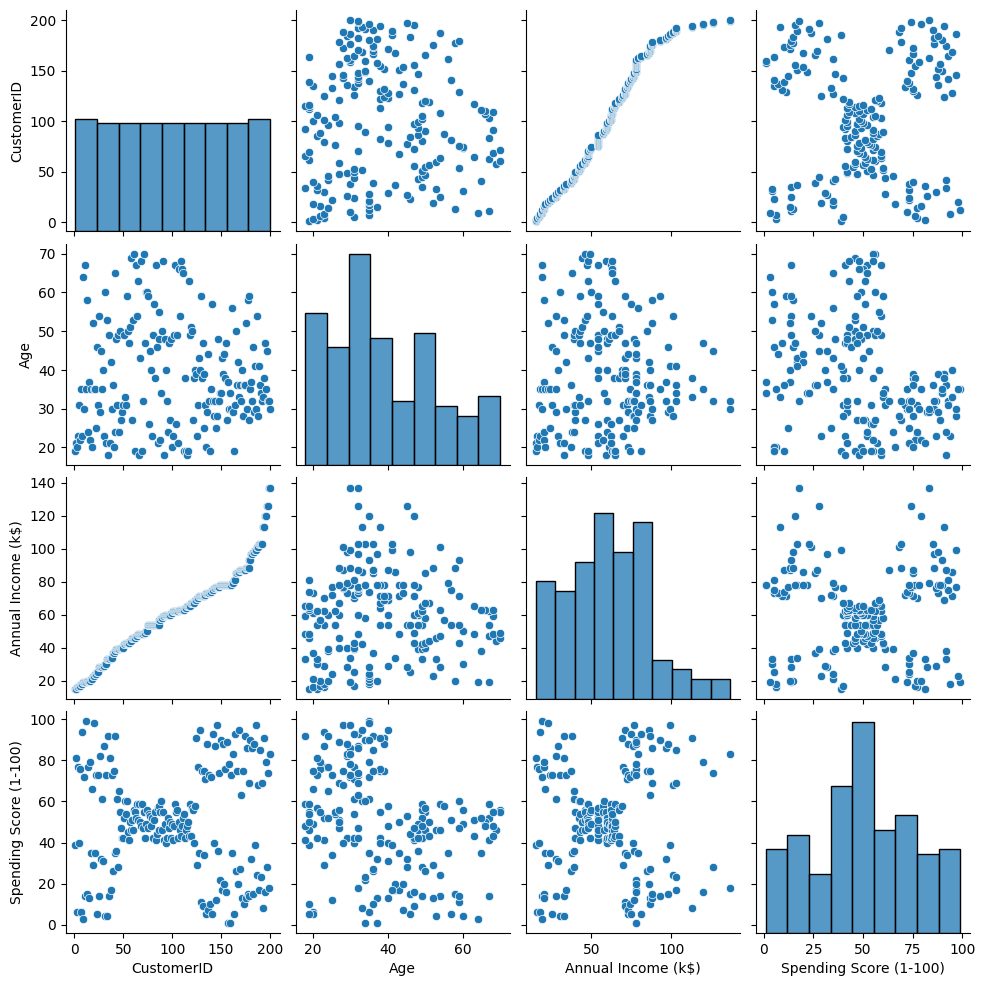

In [ ]:
# Generate a standard pairplot for all numeric features
import seaborn as sns


sns.pairplot(mall_data[['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Display the plot
plt.show()


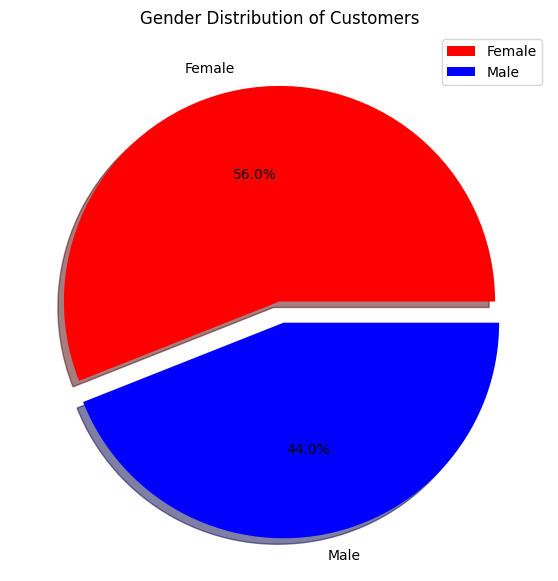

In [ ]:
import matplotlib.pyplot as plt

# Prepare data for the pie chart
size = mall_data['Gender'].value_counts()
labels = ['Female', 'Male']
colors = ['Red', 'Blue']
explode = [0, 0.1]

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(size, explode=explode, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%')
plt.legend()
plt.title("Gender Distribution of Customers")
plt.show()


Here is the pie chart showing the gender distribution of customers:

Pink (Female): Represents 56% of the customers.

Blue (Male): Represents 44% of the customers.

The slice for males is slightly exploded for better visibility.

Let me know if you'd like further analysis or customization! ​

<ipython-input-11-8264655cd77c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=mall_data['Age'], palette="viridis")


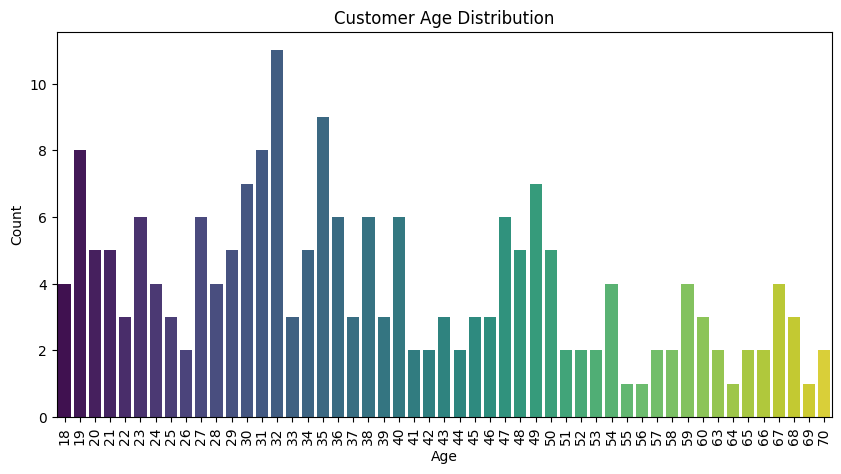

In [ ]:
# Create a count plot for the 'Age' column
plt.figure(figsize=(10, 5))
sns.countplot(x=mall_data['Age'], palette="viridis")
plt.xticks(rotation=90)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


<ipython-input-12-03c49e9277f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=mall_data['Gender'], y=mall_data['Spending Score (1-100)'], palette="Set2")


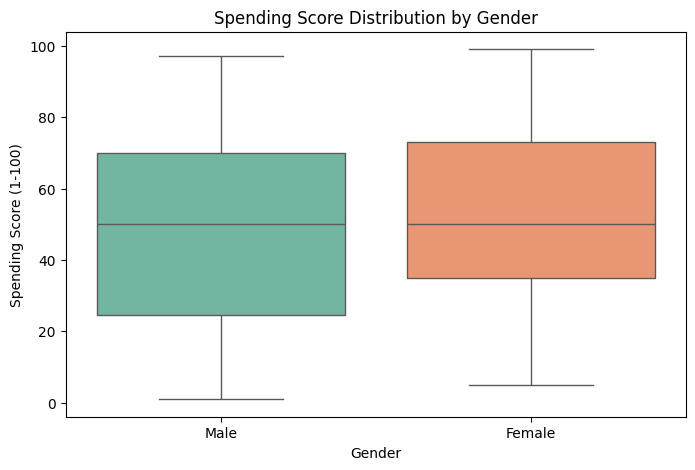

In [ ]:
# Create a boxplot to compare Spending Score across Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x=mall_data['Gender'], y=mall_data['Spending Score (1-100)'], palette="Set2")
plt.title("Spending Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.show()


This boxplot shows the distribution of spending scores (1-100) for males and females:



In [ ]:
# Check for missing values in the dataset
missing_values = mall_data.isnull().sum()
missing_values


,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0
Cluster,0


In [ ]:
# Check for duplicate rows in the dataset
duplicate_count = mall_data.duplicated().sum()
print("Duplicated:", duplicate_count)


Duplicated: 0


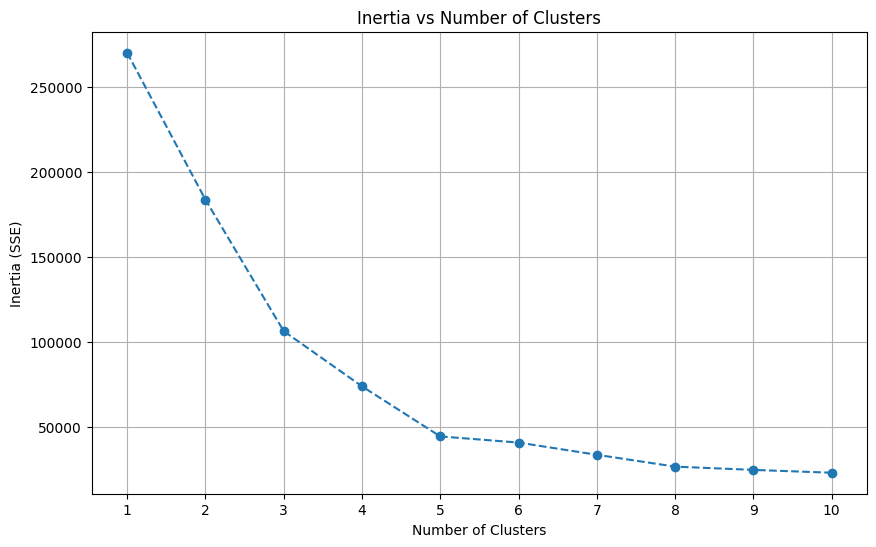

In [5]:
from sklearn.cluster import KMeans
import numpy as np

def plot_inertia_vs_clusters(data, max_clusters=10):
    """
    Plots inertia (SSE) versus number of clusters for KMeans clustering.

    Parameters:
    - data: The dataset to cluster (numpy array or DataFrame).
    - max_clusters: Maximum number of clusters to evaluate.
    """
    inertias = []
    cluster_range = range(1, max_clusters + 1)

    # Compute inertia for each number of clusters
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    # Plot inertia vs cluster numbers
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, inertias, marker='o', linestyle='--')
    plt.title("Inertia vs Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia (SSE)")
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

# Prepare data for clustering
features = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Plot inertia vs cluster numbers
plot_inertia_vs_clusters(features, max_clusters=10)


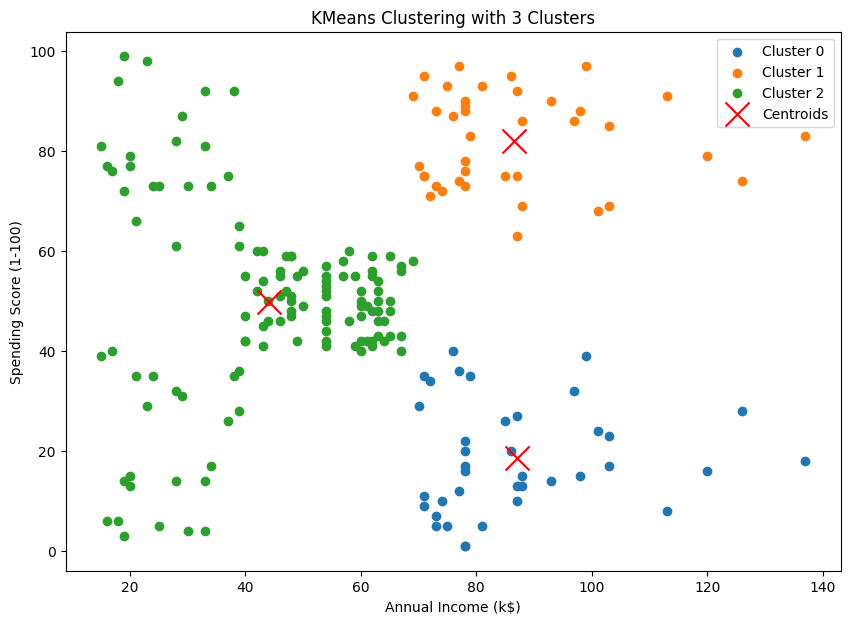

In [6]:
# Apply KMeans with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
mall_data['Cluster_3'] = kmeans_3.fit_predict(features)

# Plot the clustering results
plt.figure(figsize=(10, 7))
for cluster_id in range(3):
    cluster_points = features[mall_data['Cluster_3'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}')

# Plot cluster centers
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1],
            s=300, c='red', marker='x', label='Centroids')

plt.title("KMeans Clustering with 3 Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


This scatter plot shows the results of clustering customers into 3 clusters using the KMeans algorithm:



# Show clustering results with fve clusters.


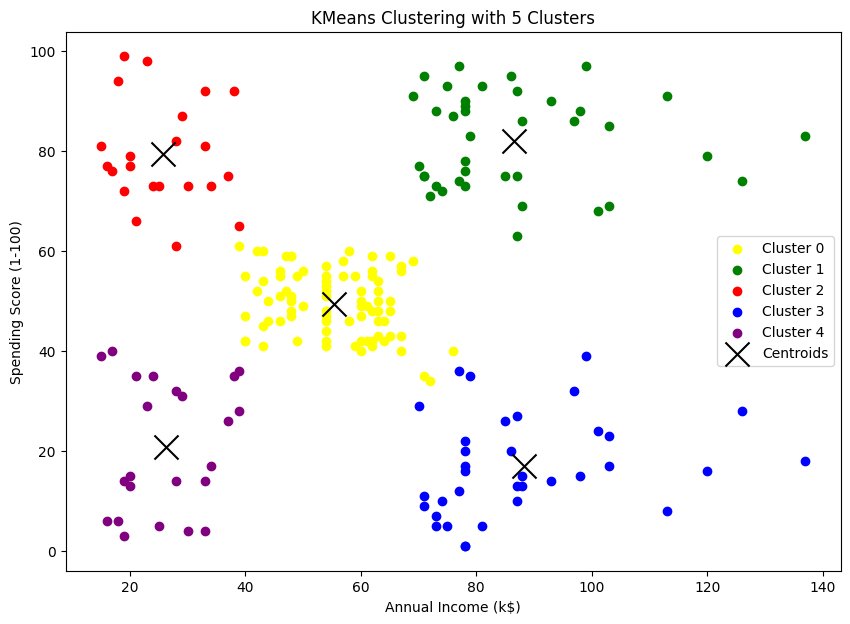

In [7]:
# Apply KMeans with 5 clusters
kmeans_5 = KMeans(n_clusters=5, random_state=42)
mall_data['Cluster_5'] = kmeans_5.fit_predict(features)

# Plot the clustering results
plt.figure(figsize=(10, 7))
colors = ['yellow', 'green', 'red', 'blue', 'purple']

for cluster_id, color in enumerate(colors):
    cluster_points = features[mall_data['Cluster_5'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', color=color)

# Plot cluster centers
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1],
            s=300, c='black', marker='x', label='Centroids')

plt.title("KMeans Clustering with 5 Clusters")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


### i want to save both results 3 and 5 as csv file download



In [8]:
# Save clustering results for 3 clusters and 5 clusters to CSV files
file_path_3_clusters = "Mall_Customers_with_3_Clusters.csv"
file_path_5_clusters = "Mall_Customers_with_5_Clusters.csv"

mall_data.to_csv(file_path_3_clusters, index=False, columns=['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_3'])
mall_data.to_csv(file_path_5_clusters, index=False, columns=['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster_5'])

file_path_3_clusters, file_path_5_clusters


('Mall_Customers_with_3_Clusters.csv', 'Mall_Customers_with_5_Clusters.csv')

Visualize spending patterns by age.


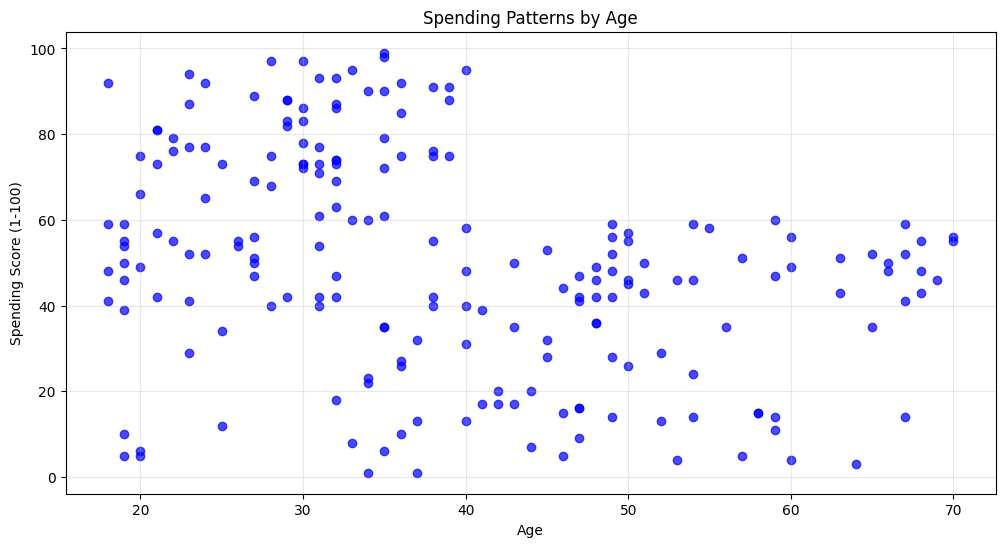

In [ ]:
# Visualize spending patterns by age using a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(mall_data['Age'], mall_data['Spending Score (1-100)'], c='blue', alpha=0.7)
plt.title("Spending Patterns by Age")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.grid(alpha=0.3)
plt.show()


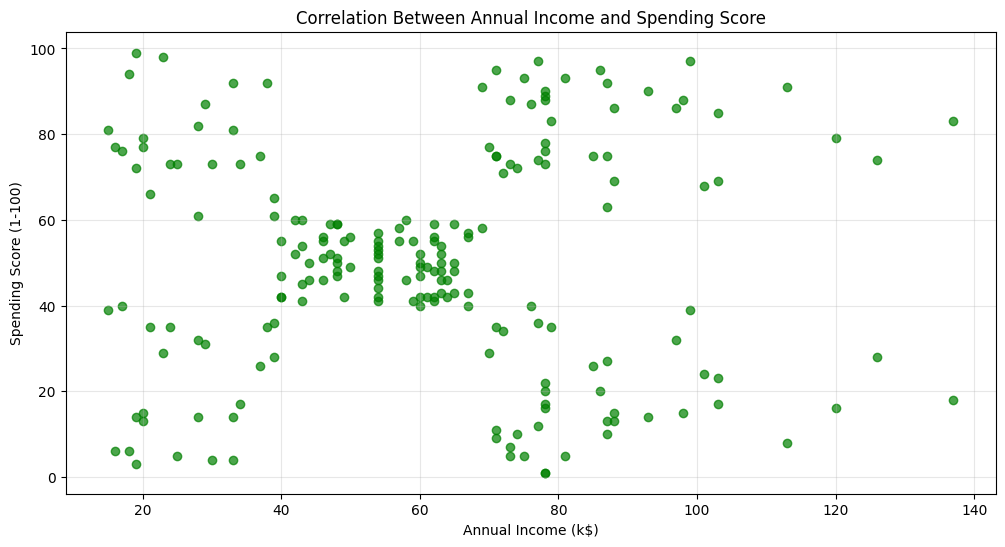

In [ ]:
# Visualize the relationship between Annual Income and Spending Score
plt.figure(figsize=(12, 6))
plt.scatter(mall_data['Annual Income (k$)'], mall_data['Spending Score (1-100)'], c='green', alpha=0.7)
plt.title("Correlation Between Annual Income and Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(alpha=0.3)
plt.show()


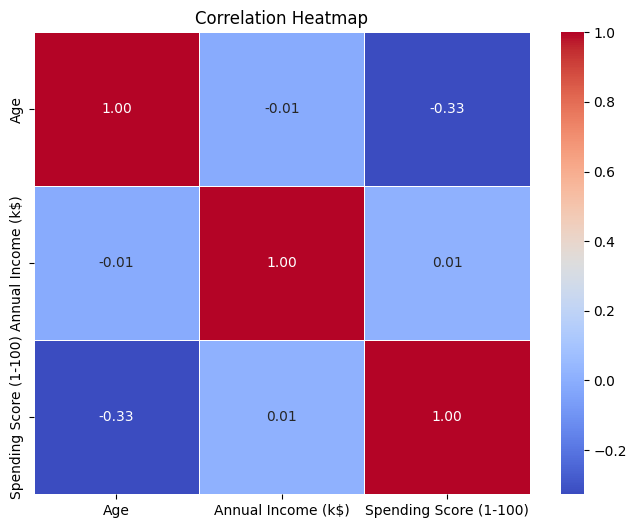

In [ ]:
# Compute the correlation matrix for numeric columns
correlation_matrix = mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


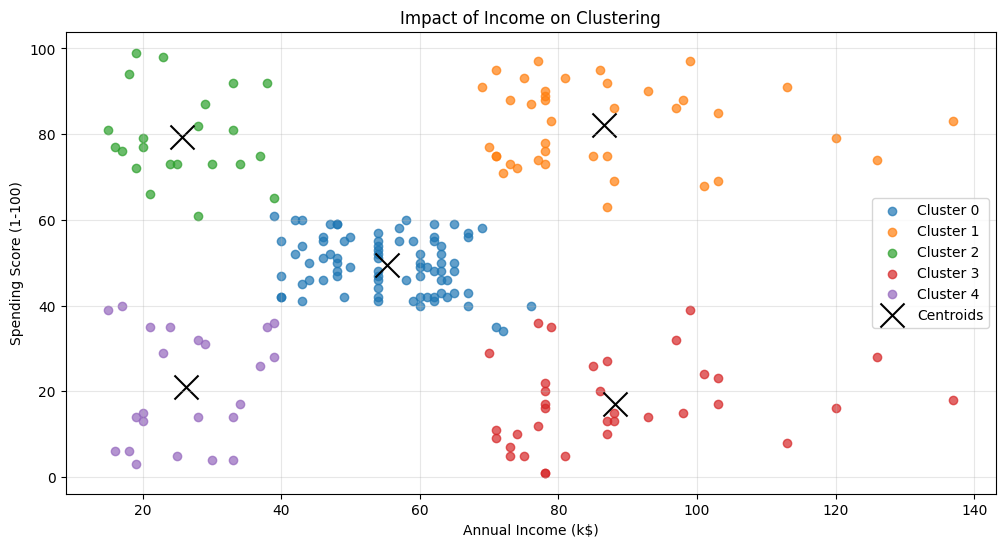

In [ ]:
# Visualize clustering results with Annual Income and Spending Score
plt.figure(figsize=(12, 6))
for cluster_id in range(5):  # Assuming 5 clusters from earlier analysis
    cluster_points = features[mall_data['Cluster_5'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.7)

# Plot cluster centers
plt.scatter(kmeans_5.cluster_centers_[:, 0], kmeans_5.cluster_centers_[:, 1],
            s=300, c='black', marker='x', label='Centroids')

plt.title("Impact of Income on Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
